In [1]:
import numpy as np
import pandas as pd

In [2]:
#Read in genotype data

genotype_df = pd.read_csv("genotypes.txt.gz",header=None,delimiter="\t")
genotype_df

,0,1,2,3,4,5,6,7,8,9,...,2994,2995,2996,2997,2998,2999,3000,3001,3002,3003
0,1,91514,91515,rs376723915_A_C_0.426717,0,1,0,2,0,0,...,0,1,1,0,2,2,1,2,0,1
1,1,546801,546802,rs113633859_G_C_0.323283,0,0,0,0,2,0,...,1,1,0,1,2,0,0,0,0,1
2,1,568708,568709,rs148329687_A_G_0.189497,1,0,2,0,0,0,...,0,1,0,1,0,0,0,0,0,0
3,1,714018,714019,rs114983708_A_G_0.138379,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,1,743020,743021,rs3964475_T_C_0.107428,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20385,1,249157314,249157315,rs57752339_G_T_0.210663,0,0,0,1,0,1,...,0,1,0,0,2,0,0,0,0,0
20386,1,249168106,249168107,rs4926501_G_C_0.455072,1,0,2,1,1,1,...,2,1,2,2,2,1,0,0,1,0
20387,1,249182057,249182058,rs12566755_A_G_0.182308,1,0,1,1,1,1,...,2,1,1,1,0,0,0,0,1,0
20388,1,249201267,249201268,rs7544246_G_A_0.556909,1,0,2,1,1,2,...,2,2,1,2,1,0,0,1,2,1


In [4]:
#Read in sample id's

sample_ids = pd.read_csv("genotype_sample_ids.list",header=None)
sample_list = list(sample_ids[0])
sample_ids

,0
0,d8e4f50989cf4f4142627b2e01dde505eafe0cad
1,4d784bfc402f201b78efb2404ed7c8b9ebf2126a
2,81b832a049175854a6054c729e403e43bfb11bc6
3,f5edd61883f0e8b42a7cc77757419b4161c4aa9a
4,ccf1a224f9e5e3c4780dac429691b56593b723b3
...,...
2995,b70c53920c2b178c9d901d793e18423c8f338cd8
2996,bfc4179929025f9e8d877585e97e009cfa705aed
2997,cb2cd678bc0c62f30443514f98bf067e443c929e
2998,76e1d8e319e270e45f1cd0641c8842af6f9dd2b3


In [5]:
#Load Phenotype 4 data and set correct order

ph4 = pd.read_fwf("phenotypes_4.txt",header=None)
ph4.set_axis(['id','phenotype'],axis='columns',inplace=True)
ph4.set_index('id',inplace=True)
ph4 = ph4.loc[sample_list]
ph4

,phenotype
id,
d8e4f50989cf4f4142627b2e01dde505eafe0cad,1
4d784bfc402f201b78efb2404ed7c8b9ebf2126a,1
81b832a049175854a6054c729e403e43bfb11bc6,1
f5edd61883f0e8b42a7cc77757419b4161c4aa9a,1
ccf1a224f9e5e3c4780dac429691b56593b723b3,0
...,...
b70c53920c2b178c9d901d793e18423c8f338cd8,1
bfc4179929025f9e8d877585e97e009cfa705aed,1
cb2cd678bc0c62f30443514f98bf067e443c929e,1


In [6]:
#Load Phenotype 5 data and set correct order.

ph5 = pd.read_fwf("phenotypes_5.txt",header=None)
ph5.set_axis(['id','phenotype'],axis='columns',inplace=True)
ph5.set_index('id',inplace=True)
ph5 = ph5.loc[sample_list]
ph5

,phenotype
id,
d8e4f50989cf4f4142627b2e01dde505eafe0cad,0
4d784bfc402f201b78efb2404ed7c8b9ebf2126a,0
81b832a049175854a6054c729e403e43bfb11bc6,0
f5edd61883f0e8b42a7cc77757419b4161c4aa9a,0
ccf1a224f9e5e3c4780dac429691b56593b723b3,0
...,...
b70c53920c2b178c9d901d793e18423c8f338cd8,0
bfc4179929025f9e8d877585e97e009cfa705aed,1
cb2cd678bc0c62f30443514f98bf067e443c929e,0


In [7]:
X = genotype_df.T[4:]
X

,0,1,2,3,4,5,6,7,8,9,...,20380,20381,20382,20383,20384,20385,20386,20387,20388,20389
4,0,0,1,0,0,2,0,0,1,0,...,0,1,1,1,0,0,1,1,1,2
5,1,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,2,1,0,1,1,0,0,0,...,0,2,2,1,0,0,2,1,2,1
7,2,0,0,0,1,0,2,0,0,0,...,1,1,1,1,1,1,1,1,1,1
8,0,2,0,0,0,0,2,0,0,1,...,1,1,1,1,0,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999,2,0,0,0,1,0,2,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3000,1,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3001,2,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,1,2
3002,0,0,0,0,0,1,1,0,1,1,...,0,2,2,1,0,0,1,1,2,0


In [15]:
X.mean(axis=1)

4       0.720942
5       0.722413
6       0.716528
7       0.717263
8       0.776018
          ...   
2999    0.735262
3000    0.733399
3001    0.721677
3002    0.716871
3003    0.728102
Length: 3000, dtype: float64

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report, plot_roc_curve

In [113]:
y = np.array(ph4).ravel()

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=103)

In [165]:
log4 = LogisticRegression(penalty='l1',solver='liblinear',C=.07)

In [166]:
log4.fit(X_train,y_train)

LogisticRegression(C=0.07, penalty='l1', solver='liblinear')

In [167]:
pred = log4.predict(X_test)

In [168]:
print(confusion_matrix(y_test,pred))

[[307  56]
 [ 15 522]]


In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

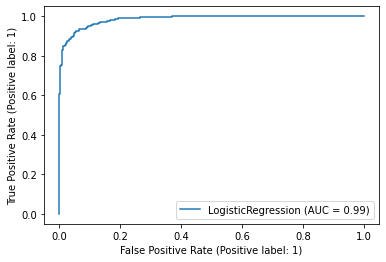

In [169]:
plot_roc_curve(log4,X_test,y_test)
plt.show()

In [170]:
roc_auc_score(y_test,log4.decision_function(X_test))

0.9853127516916242

In [171]:
np.count_nonzero(log4.coef_)

177

In [122]:
log4.predict_proba(X_test)

array([[9.60260626e-01, 3.97393744e-02],
       [7.83995912e-01, 2.16004088e-01],
       [8.31072998e-04, 9.99168927e-01],
       ...,
       [8.01359356e-01, 1.98640644e-01],
       [5.66742018e-01, 4.33257982e-01],
       [2.06616785e-01, 7.93383215e-01]])

In [97]:
log4.predict_proba(X_test).min()

1.9701954134143662e-05

TypeError: 'tuple' object is not callable

In [123]:
log4.intercept_

array([0.])

In [124]:
raw_scores = np.array(X_test).dot(log4.coef_.T)
raw_scores

array([[-3.1848622367778767],
       [-1.2891064738645874],
       [7.091961505223792],
       [-0.3572605299449392],
       [0.7864162768431937],
       [2.7637603764204837],
       [1.2973811756016218],
       [-0.9273106046500579],
       [-1.677752087514937],
       [-0.5366944969133121],
       [1.3106853611799147],
       [9.390561390893147],
       [-2.1712657335866634],
       [0.5871234845573531],
       [-2.9257567090780734],
       [-7.0536954198176955],
       [-3.366210841967746],
       [1.6954171840543077],
       [-0.8417518830615247],
       [4.187872064857665],
       [-0.19780865926988955],
       [4.793941539452594],
       [6.33353441919018],
       [-3.763525119701246],
       [-0.9274038957570886],
       [-0.24678169548726503],
       [2.294232059831012],
       [2.6809415252238464],
       [1.4648562215084127],
       [6.417584640915246],
       [4.088550292593179],
       [-0.7903011583754456],
       [-0.04921607200807765],
       [-0.3251363256639923],
     

In [125]:
raw_scores.min()

-9.49758728919889

In [126]:
raw_scores.max()

11.534331795966533

In [107]:
np.exp(-.272448)/(1+np.exp(-.272448))

0.4323062135943817

In [108]:
np.exp(4.50447)/(1+np.exp(4.50447))

0.9890615233942458

In [109]:
1/(1+np.exp(1.5638997))

0.17308777743046067

In [172]:
y = np.array(ph5).ravel()

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=103)

In [181]:
log5 = LogisticRegression(penalty='l1',solver='liblinear',C=.075)

In [182]:
log5.fit(X_train,y_train)

LogisticRegression(C=0.075, penalty='l1', solver='liblinear')

In [183]:
pred = log5.predict(X_test)

In [184]:
print(confusion_matrix(y_test,pred))

[[406  19]
 [ 35 440]]


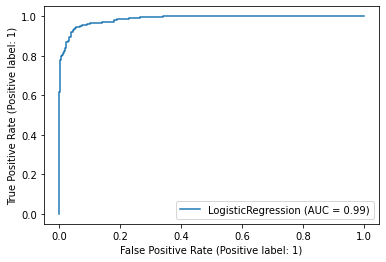

In [185]:
plot_roc_curve(log5,X_test,y_test)
plt.show()

In [186]:
roc_auc_score(y_test,log5.decision_function(X_test))

0.9861845201238391

In [187]:
np.count_nonzero(log5.coef_)

208